In [1]:
!pip install hydra-core
!pip install pytorch-lightning
!pip install rasterio
!pip install shapely
!pip install torchgeo
!pip install verde
!pip install Cartopy
!pip install tifffile
!pip install planetary-computer


  Using cached hydra_core-1.3.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached antlr4-python3-runtime-4.9.3.tar.gz (117 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144576 sha256=934ba1ca47dad64fb58935815e36f8b0279e445ba059306b1a650f6667f4b171
  Stored in directory: c:\users\isabelle\appdata\local\pip\cache\wheels\1a\97\32\461f837398029ad76911109f07047fde1d7b661a147c7c56d1
Successfully built antlr4-python3-runtime
   ---------------------------------------- 0.0/815.2 kB ? eta -:--:--
   --------- ------------------------------ 194.6/815.2 kB 4.0 MB/s eta 0:00:01
   ------------------------ --------------- 491.5/815.2 kB 6.2 MB/s eta 0:00:01
   ----

In [ ]:
!sbatch launch.sh

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
%matplotlib inline

In [41]:
dataframe_A = pd.read_csv('outputs/cnn_on_ms_poverty/2024-08-29_17-14-16/fold_2/metrics.csv')
dataframe_B = pd.read_csv('outputs/cnn_on_ms_poverty/2024-08-29_17-14-16/fold_3/metrics.csv')
dataframe_C = pd.read_csv('outputs/cnn_on_ms_poverty/2024-08-29_17-14-16/fold_4/metrics.csv')
dataframe_D = pd.read_csv('outputs/cnn_on_ms_poverty/2024-08-29_17-14-16/fold_5/metrics.csv')
dataframe_E = pd.read_csv('outputs/cnn_on_ms_poverty/2024-08-29_17-14-16/fold_1/metrics.csv')

dataframe_all = [dataframe_A, dataframe_B, dataframe_C, dataframe_D, dataframe_E]

In [11]:
df_train = dataframe[dataframe['loss/train_epoch']>0]
df_val = dataframe[dataframe['loss/val_epoch']>0]

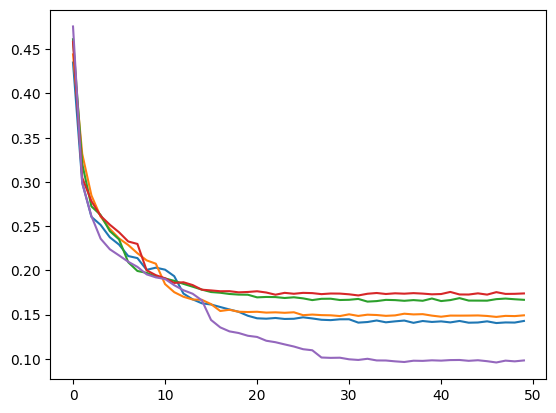

In [43]:
for fold in ['A', 'B', 'C', 'D', 'E']:
    i = ord(fold) - ord('A')

    dataframe = dataframe_all[i]

    df_train = dataframe[dataframe['loss/train_epoch']>0]
    
    x= df_train['epoch']
    y = df_train['loss/train_epoch']
    plt.plot(x,y)
plt.show()

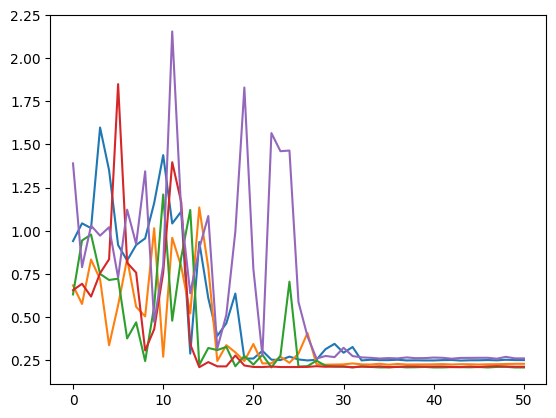

In [47]:
for fold in ['A', 'B', 'C', 'D', 'E']:
    i = ord(fold) - ord('A')

    dataframe = dataframe_all[i]

    df_val = dataframe[dataframe['loss/val_epoch']>0]
    
    x= df_val['epoch']
    y = df_val['loss/val_epoch']
    plt.plot(x,y)
plt.show()

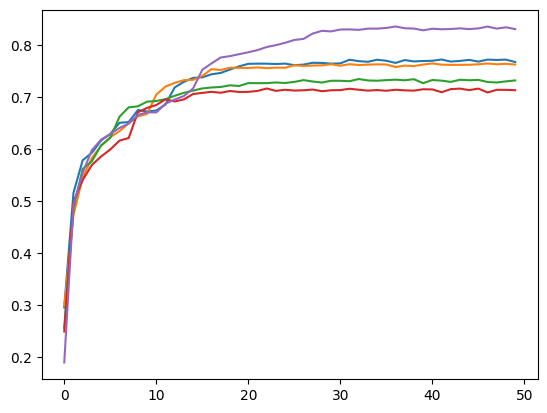

In [48]:
for fold in ['A', 'B', 'C', 'D', 'E']:
    i = ord(fold) - ord('A')

    dataframe = dataframe_all[i]

    df_train = dataframe[dataframe['regression_R2score/train_epoch']>0]
    
    x= df_train['epoch']
    y = df_train['regression_R2score/train_epoch']
    plt.plot(x,y)
plt.show()

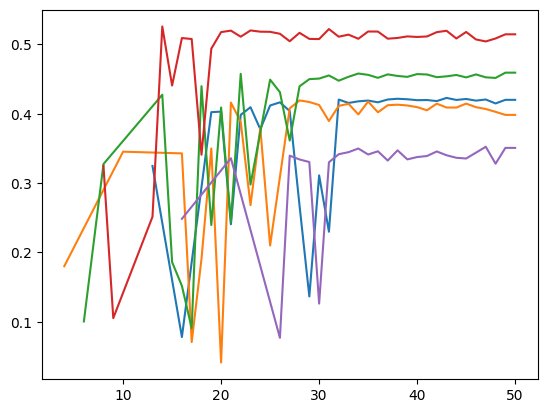

In [49]:
for fold in ['A', 'B', 'C', 'D', 'E']:
    i = ord(fold) - ord('A')

    dataframe = dataframe_all[i]

    df_train = dataframe[dataframe['regression_R2score/val_epoch']>0]
    
    x= df_train['epoch']
    y = df_train['regression_R2score/val_epoch']
    plt.plot(x,y)
plt.show()

In [28]:
# Compute R2

# CSV to df
save_path = 'outputs/cnn_on_ms_poverty/predictions_test_dataset_full.csv'
df_test = pd.read_csv(save_path)
df_test = df_test.rename(columns={"wealthpooled": "True Wealth", "predicted_wealth": "Predicted Wealth"})

# Compute R2
df_test= df_test[~df_test['True Wealth'].isna()]
# df_test2 = df_test2[df_test2['fold']=='E']
r2_all= r2_score(df_test['Predicted Wealth'], df_test['True Wealth'])
print(f'r2_all = {r2_all}')

r2_all = 0.4644939607560338


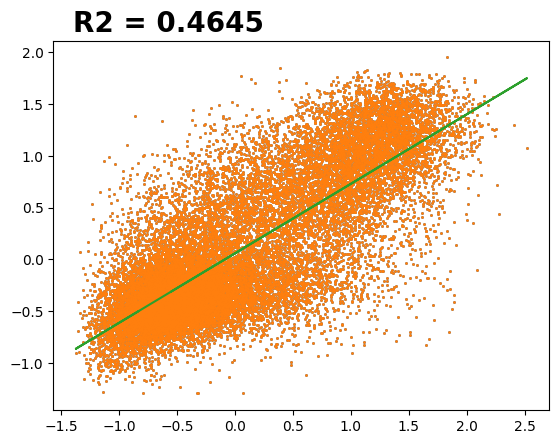

In [40]:
x = df_test['True Wealth']
y = df_test['Predicted Wealth']

#create basic scatterplot
plt.plot(x, y, 'o', markersize=1)

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

plt.text(-1.4, 2.2, 'R2 = ' + str(round(r2_all, 4)), fontsize='20', weight='bold')
plt.show()